* 1. 데이터 전처리(결측값, 이상값)
* 2. EDA
* 3. Feature Engineering 
* 4. Feature Selection
* 5. 데이터 분할
* 6. k-fold 교차검증, gridsearch, randomsearch, 데이터증폭pipeline 이용해서 모델 3가지로 비교 분석

trans_date_trans_time (object): 거래가 발생한 날짜 및 시간
cc_num (int64): 사용된 신용카드 번호를 나타내는 숫자
merchant (object): 상점명 또는 거래가 발생한 가맹점의 이름
category (object): 거래가 발생한 상품 또는 서비스의 범주
amt (float64): 해당 거래의 거래 금액
first (object): 카드 소유자의 **이름
last (object): 카드 소유자의 성
gender (object): 카드 소유자의 성별
street (object): 카드 소유자의 거주지 주소의 거리
city (object): 카드 소유자의 거주지 도시
state (object): 카드 소유자의 거주지 주(State)
zip (int64): 카드 소유자의 거주지 우편번호
lat (float64): 카드 소유자의 거주지 위도(latitude)
long (float64): 카드 소유자의 거주지 경도(longitude)
city_pop (int64): 카드 소유자가 거주하는 도시의 인구 수
job (object): 카드 소유자의 직업
dob (object): 카드 소유자의 출생일(Date of Birth)
trans_num (object): 각 거래에 할당된 고유 거래 번호
unix_time (int64): 거래가 발생한 시간을 유닉스 타임스탬프 형식으로 나타낸 값
merch_lat (float64): 가맹점의 위도(latitude) 거래가 발생한 상점의 위치 정보
merch_long (float64): 가맹점의 경도(longitude)
is_fraud (int64): 거래가 사기(fraud)여부를 나타내는 열입니다. 1은 사기, 0은 정상 거래

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
data = pd.read_csv("./data/creaditcard_fraud_data.csv")
data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [3]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [4]:
data['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [44]:
pd.options.display.float_format = '{:.4f}'.format

In [45]:
data.describe()

,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,distance,hour
count,1852394,1852394.0000,1852394.0000,1852394.0000,1852394.0000,1852394.0000,1852394.0000,1852394.0000,1852394.0000,1852394.0000,1852394.0000,1852394.0000,1852394.0000
mean,2020-01-20 21:31:46.801827328,417386038393710400.0000,70.0636,48813.2582,38.5393,-90.2278,88643.6745,1358674218.8344,38.5390,-90.2279,0.0052,76.1117,12.8061
min,2019-01-01 00:00:18,60416207185.0000,1.0000,1257.0000,20.0271,-165.6723,23.0000,1325376018.0000,19.0274,-166.6716,0.0000,0.0223,0.0000
25%,2019-07-23 04:13:43.750000128,180042946491150.0000,9.6400,26237.0000,34.6689,-96.7980,741.0000,1343016823.7500,34.7401,-96.8994,0.0000,55.3201,7.0000
50%,2020-01-02 01:15:31,3521417320836166.0000,47.4500,48174.0000,39.3543,-87.4769,2443.0000,1357089331.0000,39.3689,-87.4407,0.0000,78.2164,14.0000
75%,2020-07-23 12:11:25.249999872,4642255475285942.0000,83.1000,72042.0000,41.9404,-80.1580,20328.0000,1374581485.2500,41.9563,-80.2451,0.0000,98.5095,19.0000
max,2020-12-31 23:59:34,4992346398065154048.0000,28948.9000,99921.0000,66.6933,-67.9503,2906700.0000,1388534374.0000,67.5103,-66.9509,1.0000,152.1172,23.0000
std,NaN,1309115265318734848.0000,159.2540,26881.8460,5.0715,13.7479,301487.6183,18195081.3876,5.1056,13.7597,0.0720,29.1170,6.8158


In [7]:
data.isnull().sum()


trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [18]:
data['amt'].describe()

count    1.852394e+06
mean     7.006357e+01
std      1.592540e+02
min      1.000000e+00
25%      9.640000e+00
50%      4.745000e+01
75%      8.310000e+01
max      2.894890e+04
Name: amt, dtype: float64

### 사기가 발생한 가맹점의 위치와 카드소유자의 거주지 위치비교

In [19]:
# Haversine 공식을 사용해 두 지점 사이의 거리를 계산하는 함수
def haversine(lat1, lon1, lat2, lon2):
    # 지구 반지름 (km)
    R = 6371.0
    
    # 라디안으로 변환
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # 위도와 경도 차이 계산
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine 공식 적용
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # 두 지점 간의 거리 계산 (km)
    return R * c

# 거리 계산 열 추가: 카드 소유자 거주지와 가맹점 사이의 거리 (km)
data['distance'] = haversine(
    data['lat'], data['long'], data['merch_lat'], data['merch_long']
)

# 계산된 거리 확인
data[['distance', 'is_fraud']].head()


,distance,is_fraud
0,78.597568,0
1,30.212176,0
2,108.206083,0
3,95.673231,0
4,77.556744,0


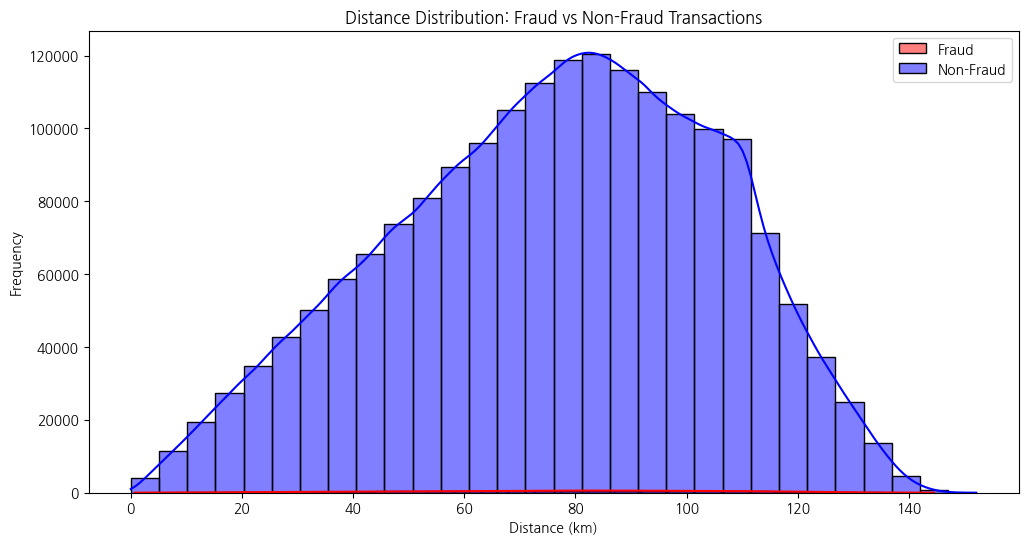

In [20]:

# 사기 거래와 정상 거래 데이터 분리
fraud_data = data[data['is_fraud'] == 1]
non_fraud_data = data[data['is_fraud'] == 0]

# 거리 분포 시각화
plt.figure(figsize=(12, 6))

# 사기 거래 거리 분포
sns.histplot(fraud_data['distance'], bins=30, color='red', label='Fraud', kde=True)

# 정상 거래 거리 분포
sns.histplot(non_fraud_data['distance'], bins=30, color='blue', label='Non-Fraud', kde=True)

plt.legend()
plt.title('Distance Distribution: Fraud vs Non-Fraud Transactions')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

In [21]:
# 거리 통계 계산
fraud_distance_stats = fraud_data['distance'].describe()
non_fraud_distance_stats = non_fraud_data['distance'].describe()

print("Fraud Transactions Distance Stats:\n", fraud_distance_stats)
print("\nNon-Fraud Transactions Distance Stats:\n", non_fraud_distance_stats)


Fraud Transactions Distance Stats:
 count    9651.000000
mean       76.256233
std        28.865545
min         0.738769
25%        55.573136
50%        78.101922
75%        98.418296
max       144.522410
Name: distance, dtype: float64

Non-Fraud Transactions Distance Stats:
 count    1.842743e+06
mean     7.611097e+01
std      2.911829e+01
min      2.225452e-02
25%      5.531873e+01
50%      7.821670e+01
75%      9.851020e+01
max      1.521172e+02
Name: distance, dtype: float64


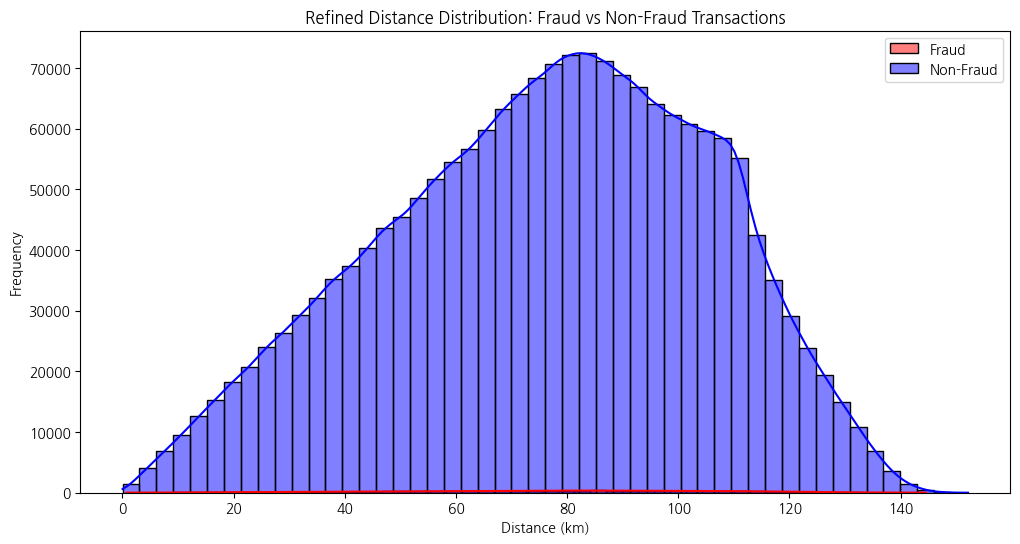

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(fraud_data['distance'], bins=50, color='red', label='Fraud', kde=True, alpha=0.5)
sns.histplot(non_fraud_data['distance'], bins=50, color='blue', label='Non-Fraud', kde=True, alpha=0.5)
plt.legend()
plt.title('Refined Distance Distribution: Fraud vs Non-Fraud Transactions')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()


In [23]:
from scipy.stats import ttest_ind

# 두 그룹 간 거리 차이에 대한 T-검정
t_stat, p_value = ttest_ind(fraud_data['distance'], non_fraud_data['distance'], equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 0.4930723569815967, P-value: 0.621972563052682


In [ ]:
결론: 유의미하지 않다.

### 거래 금액과 사기 발생의 관계

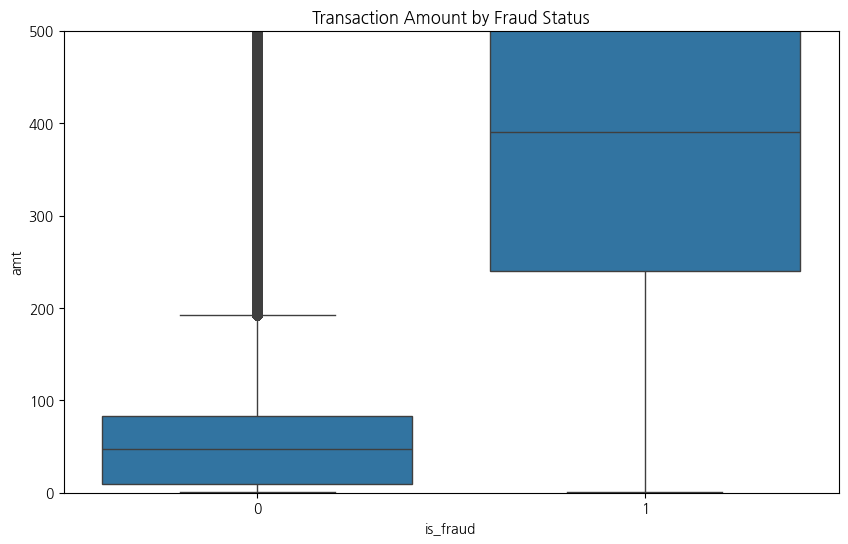

In [24]:
# 사기와 정상 거래의 금액 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amt', data=data)
plt.ylim(0, 500)  # 극단적인 이상치 제한
plt.title('Transaction Amount by Fraud Status')
plt.show()


In [25]:
from scipy.stats import ttest_ind

# 사기 거래와 정상 거래의 금액에 대한 T-검정
t_stat, p_value = ttest_ind(fraud_data['amt'], non_fraud_data['amt'], equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 116.27665739243675, P-value: 0.0


### 카드 소유자의 인구 수와 사기 거래의 관계

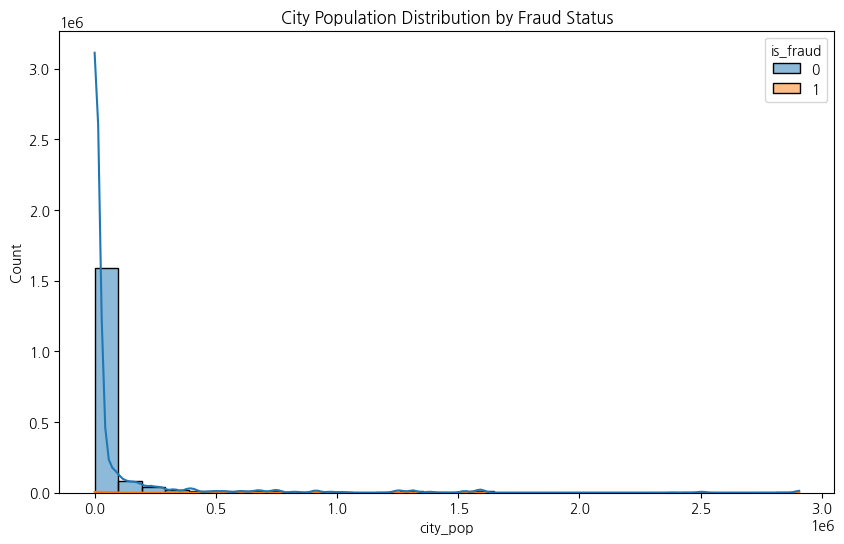

In [26]:
# 인구와 사기 거래의 상관관계 시각화
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='city_pop', hue='is_fraud', bins=30, kde=True)
plt.title('City Population Distribution by Fraud Status')
plt.show()


### 시간대별 사기거래

In [28]:
# datetime 형식으로 변환
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], errors='coerce')

# 변환 후 NaT (날짜 변환 실패) 여부 확인
print(data['trans_date_trans_time'].isnull().sum())  # NaT가 있으면 해당 개수를 반환


0


C:\Users\5-11\AppData\Local\Temp\ipykernel_17044\484171810.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_ratio_by_time = data.groupby('time_period')['is_fraud'].mean()


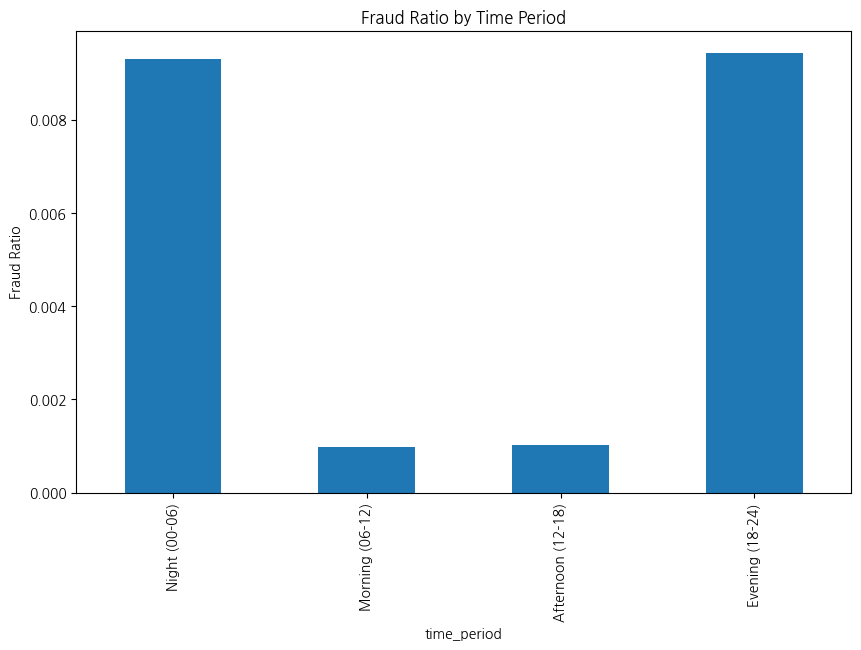

In [29]:
# 'trans_date_trans_time'에서 시간 추출
data['hour'] = data['trans_date_trans_time'].dt.hour

# 시간대 구간 나누기
bins = [0, 6, 12, 18, 24]
labels = ['Night (00-06)', 'Morning (06-12)', 'Afternoon (12-18)', 'Evening (18-24)']
data['time_period'] = pd.cut(data['hour'], bins=bins, labels=labels, right=False)

# 시간대별 사기 거래 비율 계산
fraud_ratio_by_time = data.groupby('time_period')['is_fraud'].mean()

# 시각화
fraud_ratio_by_time.plot(kind='bar', title='Fraud Ratio by Time Period', figsize=(10, 6))
plt.ylabel('Fraud Ratio')
plt.show()


저녁이랑 심야에 사기거래 비율이 높음

### 결제 카테고리별 사기여부

In [30]:
data['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

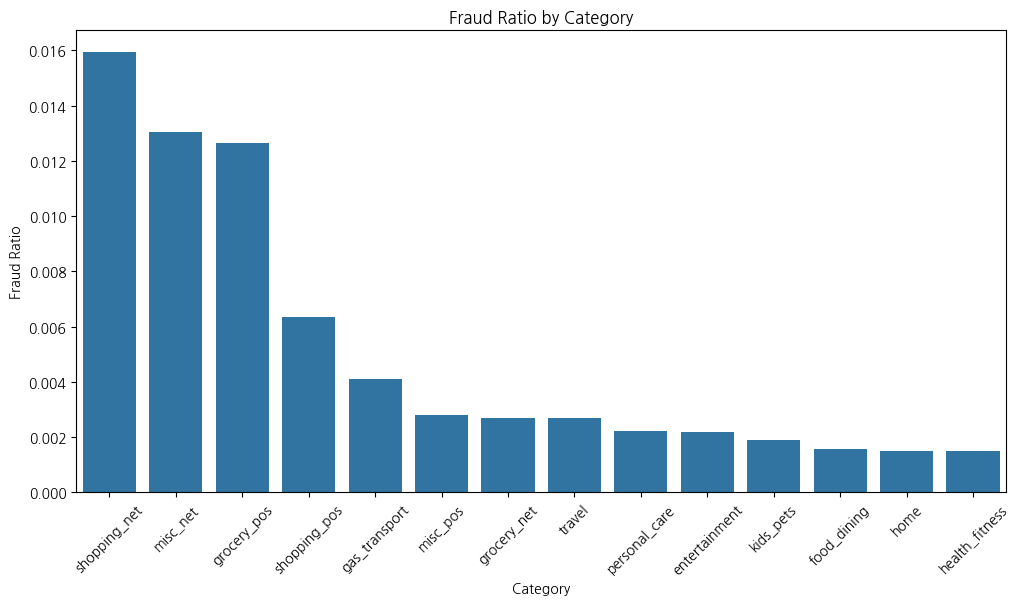

In [31]:
# 카테고리별 사기 거래 비율 계산
fraud_ratio_by_category = data.groupby('category')['is_fraud'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_ratio_by_category.index, y=fraud_ratio_by_category.values)
plt.xticks(rotation=45)
plt.title('Fraud Ratio by Category')
plt.xlabel('Category')
plt.ylabel('Fraud Ratio')
plt.show()

### 성별에 따른 사기여부

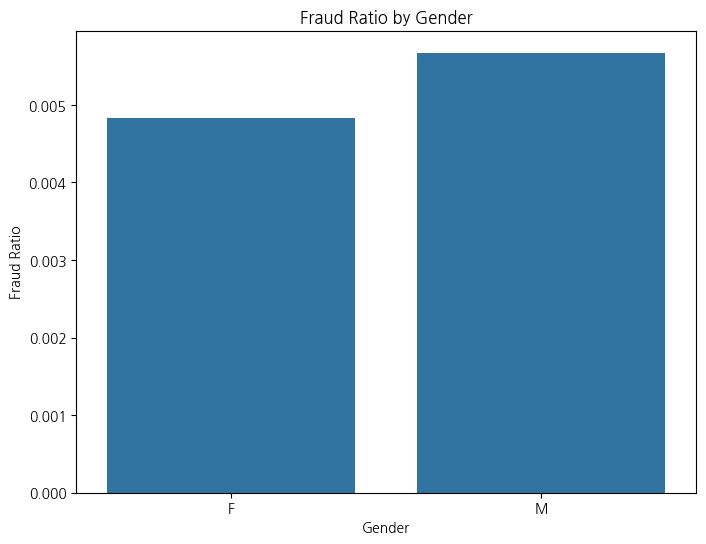

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# 성별별 사기 비율 계산
fraud_ratio_by_gender = data.groupby('gender')['is_fraud'].mean()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_ratio_by_gender.index, y=fraud_ratio_by_gender.values)
plt.title('Fraud Ratio by Gender')
plt.xlabel('Gender')
plt.ylabel('Fraud Ratio')
plt.show()


### 도시별 사기거래 비율

In [35]:
data['state'].unique()

array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI', 'DE'], dtype=object)

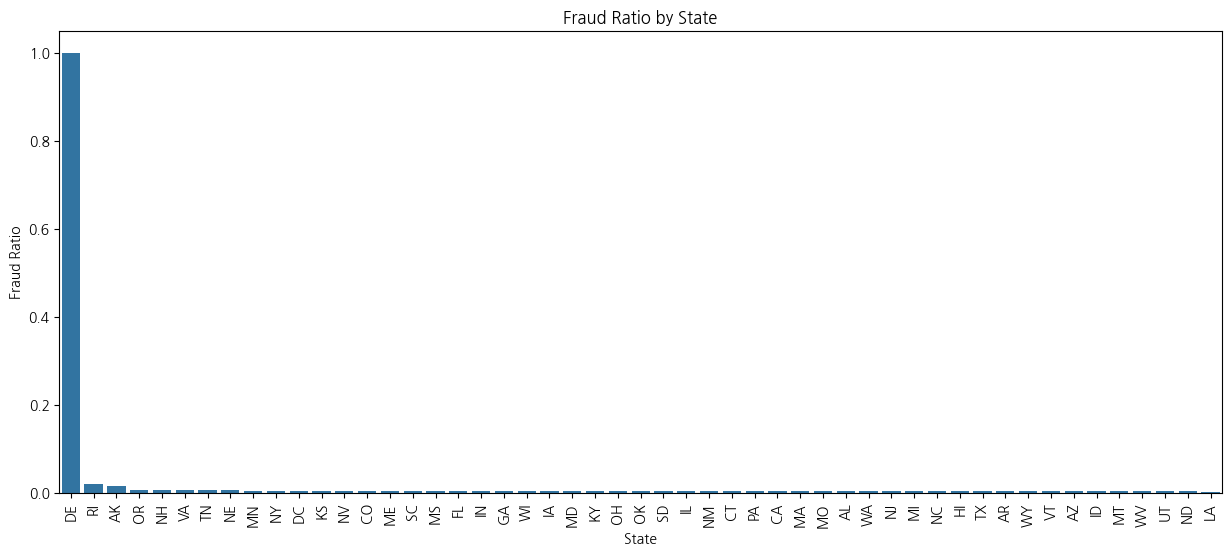

In [36]:

# State별 사기 거래 비율 계산
fraud_ratio_by_state = data.groupby('state')['is_fraud'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(15, 6))
sns.barplot(x=fraud_ratio_by_state.index, y=fraud_ratio_by_state.values)
plt.xticks(rotation=90)  # 주 이름이 많을 경우 각도를 조정
plt.title('Fraud Ratio by State')
plt.xlabel('State')
plt.ylabel('Fraud Ratio')
plt.show()

In [37]:
# Delaware의 전체 거래 수와 사기 거래 수 계산
de_transactions = data[data['state'] == 'DE']
print(f"Total Transactions in DE: {len(de_transactions)}")
print(f"Fraud Transactions in DE: {de_transactions['is_fraud'].sum()}")


Total Transactions in DE: 9
Fraud Transactions in DE: 9


In [38]:
# Delaware의 전체 거래 수와 사기 거래 수 계산
de_transactions = data[data['state'] == 'RI']
print(f"Total Transactions in RI: {len(de_transactions)}")
print(f"Fraud Transactions in RI: {de_transactions['is_fraud'].sum()}")


Total Transactions in RI: 745
Fraud Transactions in RI: 15


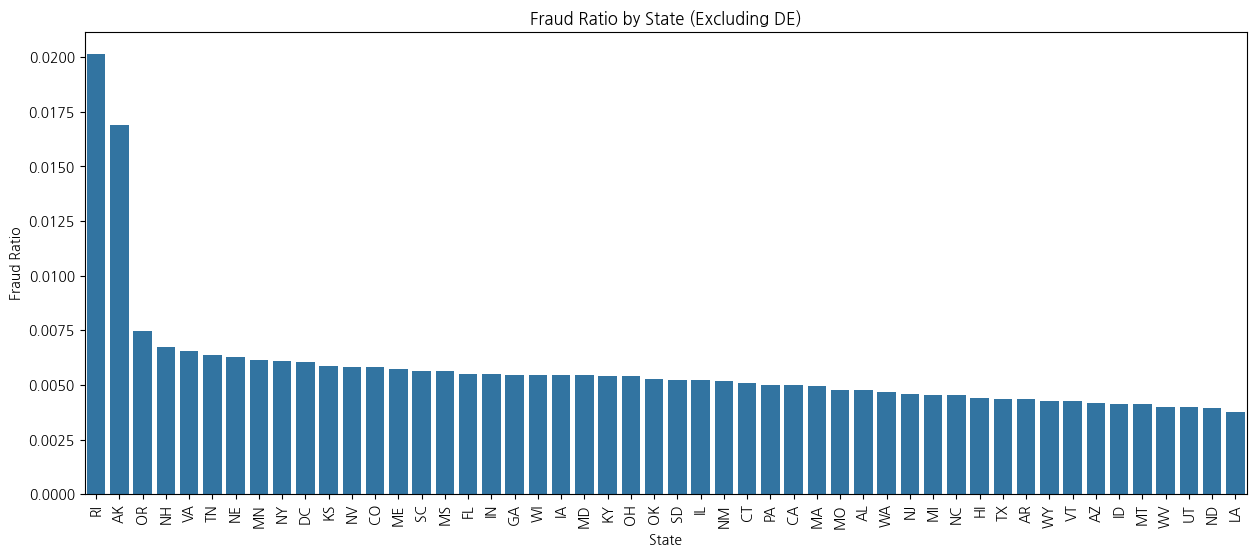

In [39]:
# DE 제외한 데이터로 사기 비율 재계산
data_no_de = data[data['state'] != 'DE']
fraud_ratio_by_state_no_de = data_no_de.groupby('state')['is_fraud'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(15, 6))
sns.barplot(x=fraud_ratio_by_state_no_de.index, y=fraud_ratio_by_state_no_de.values)
plt.xticks(rotation=90)
plt.title('Fraud Ratio by State (Excluding DE)')
plt.xlabel('State')
plt.ylabel('Fraud Ratio')
plt.show()


### 이것은 보류. 애매함

### 직업별 사기여부

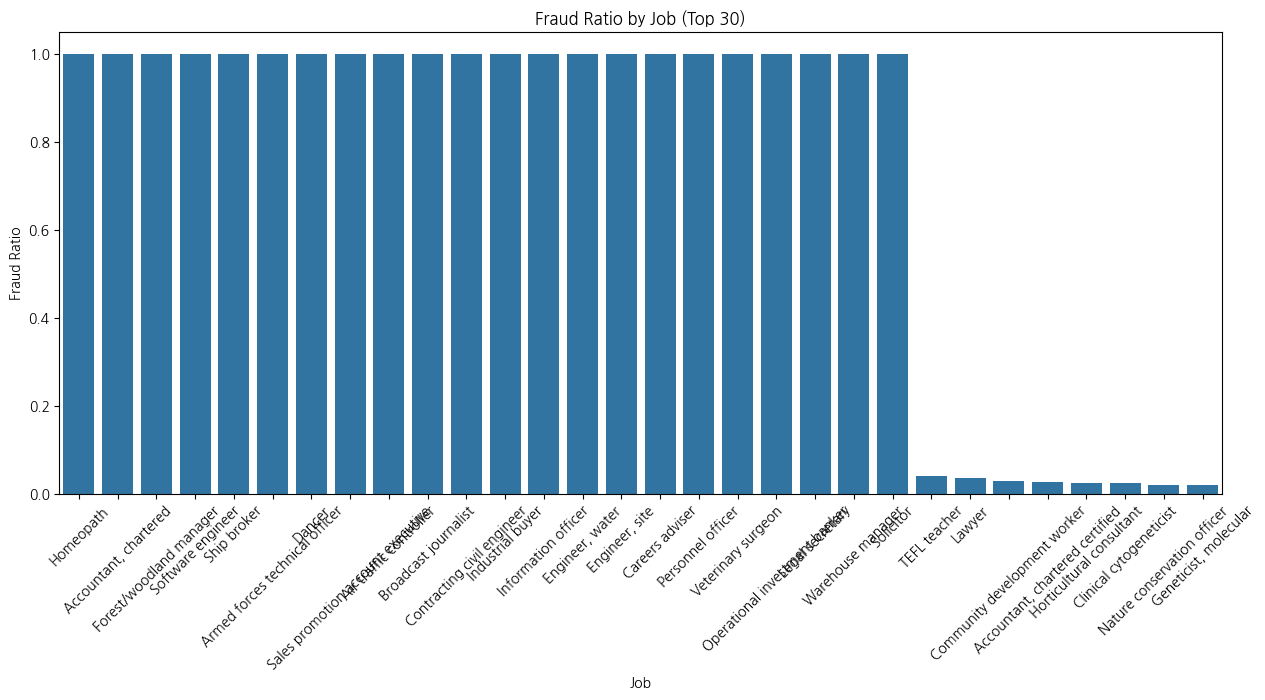

In [42]:
# 직업별 사기 거래 비율 계산
fraud_ratio_by_job = data.groupby('job')['is_fraud'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(15, 6))
sns.barplot(x=fraud_ratio_by_job.index[:30], y=fraud_ratio_by_job.values[:30])  # 상위 20개만 표시
plt.xticks(rotation=45)
plt.title('Fraud Ratio by Job (Top 30)')
plt.xlabel('Job')
plt.ylabel('Fraud Ratio')
plt.show()

### -----------------------------------------------

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# 필요한 열만 선택
data_model = data[['time_period', 'category', 'amt', 'job', 'is_fraud']]

# 범주형 변수 원-핫 인코딩
data_encoded = pd.get_dummies(data_model, columns=['time_period', 'category', 'job'])

# 훈련/테스트 데이터 분할 (80% 훈련, 30% 테스트)
X = data_encoded.drop('is_fraud', axis=1)
y = data_encoded['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# XGBoost 모델 학습
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Model Performance:")
print(classification_report(y_test, y_pred_xgb))


C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [14:15:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552781
           1       0.85      0.61      0.71      2938

    accuracy                           1.00    555719
   macro avg       0.92      0.81      0.85    555719
weighted avg       1.00      1.00      1.00    555719



In [49]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 모델 학습
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_rfc = rfc_model.predict(X_test)
print("RandomForest Model Performance:")
print(classification_report(y_test, y_pred_rfc))


RandomForest Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552781
           1       0.79      0.67      0.73      2938

    accuracy                           1.00    555719
   macro avg       0.90      0.84      0.86    555719
weighted avg       1.00      1.00      1.00    555719



In [51]:
# 열 이름을 안전하게 변환하는 함수
X_train.columns = X_train.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
X_test.columns = X_test.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)


# LightGBM 모델 학습
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# 예측 및 평가
y_pred_lgbm = lgbm_model.predict(X_test)
print("LightGBM Model Performance:")
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 6713, number of negative: 1289962
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1245
[LightGBM] [Info] Number of data points in the train set: 1296675, number of used features: 496
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005177 -> initscore=-5.258322
[LightGBM] [Info] Start training from score -5.258322
LightGBM Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552781
           1       0.57      0.27      0.36      2938

    accuracy                           1.00    555719
   macro avg       0.78      0.63      0.68    555719
weighted avg       0.99      1.00      0.99    555719



### ------------------------------smote 적용------------------------------

In [52]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 필요한 열만 선택
data_model = data[['time_period', 'category', 'amt', 'job', 'is_fraud']]

# 범주형 변수 원-핫 인코딩
data_encoded = pd.get_dummies(data_model, columns=['time_period', 'category', 'job'])

# 입력과 타겟 분리
X = data_encoded.drop('is_fraud', axis=1)
y = data_encoded['is_fraud']

# 훈련/테스트 데이터 분할 (80% 훈련, 30% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 클래스 분포 확인 (SMOTE 이후)
print("After SMOTE:", y_train_smote.value_counts())


MemoryError: Unable to allocate 4.93 GiB for an array with shape (1283163, 516) and data type float64

In [53]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# 필요한 열만 선택
data_model = data[['time_period', 'category', 'amt', 'job', 'is_fraud']]

# 범주형 변수 원-핫 인코딩
data_encoded = pd.get_dummies(data_model, columns=['time_period', 'category', 'job'])

# 입력과 타겟 분리
X = data_encoded.drop('is_fraud', axis=1)
y = data_encoded['is_fraud']

# 훈련/테스트 데이터 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 훈련 데이터에서 50%만 샘플링
X_train_sampled = X_train.sample(frac=0.5, random_state=42)
y_train_sampled = y_train.loc[X_train_sampled.index]

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_sampled, y_train_sampled)

# 클래스 분포 확인 (SMOTE 이후)
print("After SMOTE:", y_train_smote.value_counts())

# XGBoost 모델 학습
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_smote, y_train_smote)

# 예측 및 평가
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Model Performance:")
print(classification_report(y_test, y_pred_xgb))


After SMOTE: is_fraud
0    737103
1    737103
Name: count, dtype: int64


C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Performance:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    368549
           1       0.21      0.93      0.34      1930

    accuracy                           0.98    370479
   macro avg       0.60      0.96      0.67    370479
weighted avg       1.00      0.98      0.99    370479



In [54]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 필요한 열만 선택
data_model = data[['time_period', 'category', 'amt', 'job', 'is_fraud']]

# 범주형 변수 원-핫 인코딩
data_encoded = pd.get_dummies(data_model, columns=['time_period', 'category', 'job'])

# 입력과 타겟 분리
X = data_encoded.drop('is_fraud', axis=1)
y = data_encoded['is_fraud']

# 훈련/테스트 데이터 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 훈련 데이터에서 50% 샘플링
X_train_sampled = X_train.sample(frac=0.5, random_state=42)
y_train_sampled = y_train.loc[X_train_sampled.index]

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_sampled, y_train_sampled)

# 클래스 분포 확인 (SMOTE 이후)
print("After SMOTE:", y_train_smote.value_counts())

# RandomForestClassifier 모델 학습
rfc_model = RandomForestClassifier(random_state=42, n_estimators=100)
rfc_model.fit(X_train_smote, y_train_smote)

# 예측 및 평가
y_pred_rfc = rfc_model.predict(X_test)
print("RandomForest Model Performance:")
print(classification_report(y_test, y_pred_rfc))


After SMOTE: is_fraud
0    737103
1    737103
Name: count, dtype: int64
RandomForest Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.73      0.72      0.72      1930

    accuracy                           1.00    370479
   macro avg       0.86      0.86      0.86    370479
weighted avg       1.00      1.00      1.00    370479



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# XGBoost 모델 학습
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_smote, y_train_smote)

# 예측 및 평가
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Model Performance:")
print(classification_report(y_test, y_pred_xgb))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 모델 학습
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(X_train_smote, y_train_smote)

# 예측 및 평가
y_pred_rfc = rfc_model.predict(X_test)
print("RandomForest Model Performance:")
print(classification_report(y_test, y_pred_rfc))


In [ ]:
from lightgbm import LGBMClassifier

# LightGBM 모델 학습
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_smote, y_train_smote)

# 예측 및 평가
y_pred_lgbm = lgbm_model.predict(X_test)
print("LightGBM Model Performance:")
print(classification_report(y_test, y_pred_lgbm))


In [1]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline
# from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier


In [ ]:
pipe= Pipeline([
    ('rs', RobustScaler()),
    ('smt', SMOTE(random_state=10)),
    ('rfc', RandomForestClassifier(n_jobs=-1, random_state=10))
])

In [ ]:
# 랜덤 서치를 위한 파라미터 정의
params_rv = {
    'rfc__n_estimators': [100,200,300],
    'rfc__max_depth': [3,5,7],
}


In [ ]:
# 교차 검증을 위한 stratify-k-fold
scv = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)

In [ ]:
rand_cv = RandomizedSearchCV(pipe, param_distributions=params_rv, n_iter=10,
                            scoring='roc_auc', cv=scv, random_state=10, n_jobs=-1)
rand_cv.fit(X_train,y_train)
print("Best params:", rand_cv.best_params_)
print("Best score:", rand_cv.best_score_)
print("Best model test score:", rand_cv.score(X_valid, y_valid))